# Import Data

In [ ]:
!wget https://raw.githubusercontent.com/ZackMvP/SuitJawa/refs/heads/master/final.csv

--2025-05-16 02:54:34--  https://raw.githubusercontent.com/ZackMvP/SuitJawa/refs/heads/master/final.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171503 (167K) [text/plain]
Saving to: ‘final.csv.2’

final.csv.2         100%[===================>] 167.48K  --.-KB/s    in 0.006s  

2025-05-16 02:54:35 (27.5 MB/s) - ‘final.csv.2’ saved [171503/171503]



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv("final.csv")

In [ ]:
df

,Timestamp,main_pipe,kitchen,bathroom,pressure,leak_main,leak_kitchen,leak_bathroom
0,2025-05-13 15:20:17,0.0,0.0,0.0,3.00,0,0,0
1,2025-05-13 15:20:17,0.0,0.0,0.0,3.46,0,0,0
2,2025-05-13 15:20:17,0.0,0.0,0.0,1.42,0,0,0
3,2025-05-13 15:20:18,0.0,0.0,0.0,3.37,0,0,0
4,2025-05-13 15:20:19,0.0,0.0,0.0,4.60,0,0,0
...,...,...,...,...,...,...,...,...
3642,2025-05-13 16:33:34,0.0,0.0,0.0,3.00,0,0,0
3643,2025-05-13 16:33:35,0.0,0.0,0.0,3.16,0,0,0
3644,2025-05-13 16:33:36,0.0,0.0,0.0,2.99,0,0,0
3645,2025-05-13 16:33:37,0.0,0.0,0.0,3.00,0,0,0


# Data Preprocessing

## Converting Timestamp to Seperate Fields

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second


In [ ]:
df.describe()

,Timestamp,main_pipe,kitchen,bathroom,pressure,leak_main,leak_kitchen,leak_bathroom,Hour,Minute,Second
count,3647,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000
mean,2025-05-13 16:00:28.651494400,0.656109,0.650842,0.196808,3.054587,0.331505,0.258294,0.282424,15.553880,26.752399,29.539896
min,2025-05-13 15:20:17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000
25%,2025-05-13 15:45:03.500000,0.130000,0.000000,0.000000,2.940000,0.000000,0.000000,0.000000,15.000000,15.000000,15.000000
50%,2025-05-13 16:03:16,0.270000,0.000000,0.000000,3.020000,0.000000,0.000000,0.000000,16.000000,25.000000,30.000000
75%,2025-05-13 16:18:28.500000,0.800000,0.270000,0.130000,3.190000,1.000000,1.000000,1.000000,16.000000,33.000000,44.000000
max,2025-05-13 16:33:38,4.270000,688.530000,2.930000,6.960000,1.000000,1.000000,1.000000,16.000000,59.000000,59.000000
std,NaN,0.862666,13.183750,0.475254,0.357341,0.470819,0.437757,0.450240,0.497157,16.343990,17.271571


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      3647 non-null   datetime64[ns]
 1   main_pipe      3647 non-null   float64       
 2   kitchen        3647 non-null   float64       
 3   bathroom       3647 non-null   float64       
 4   pressure       3647 non-null   float64       
 5   leak_main      3647 non-null   int64         
 6   leak_kitchen   3647 non-null   int64         
 7   leak_bathroom  3647 non-null   int64         
 8   Hour           3647 non-null   int32         
 9   Minute         3647 non-null   int32         
 10  Second         3647 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(3)
memory usage: 270.8 KB


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df["Sensor_ID"] = le.fit_transform(df["Sensor_ID"])

##Check duplicates

In [ ]:
df.duplicated().sum()

np.int64(2)

##Correlation Table

<Axes: >

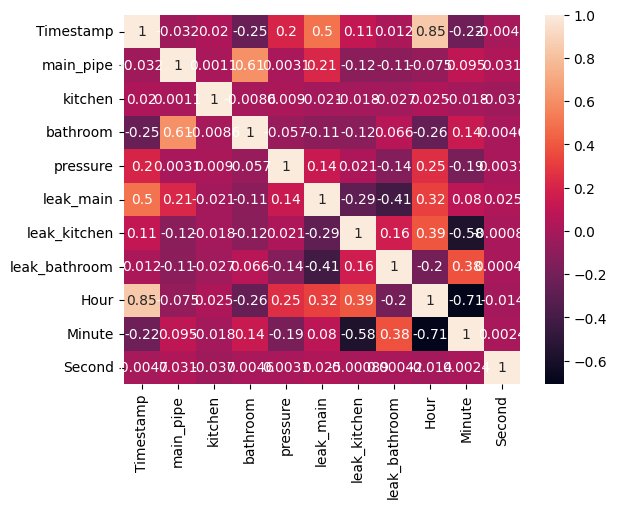

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

##Feature Selection

In [ ]:
feature = ["main_pipe","kitchen", "bathroom","pressure", "Hour","Minute", "Second"]
# feature = ["main_pipe","kitchen", "bathroom", "Minute", "Second"]
# feature = ["main_pipe","kitchen", "bathroom"]
X = df[feature].values
Y = df[["leak_main", "leak_kitchen", "leak_bathroom"]]

##Class Distribution Graph

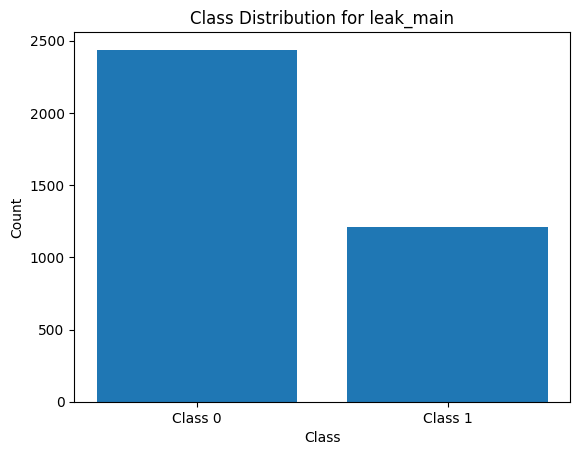

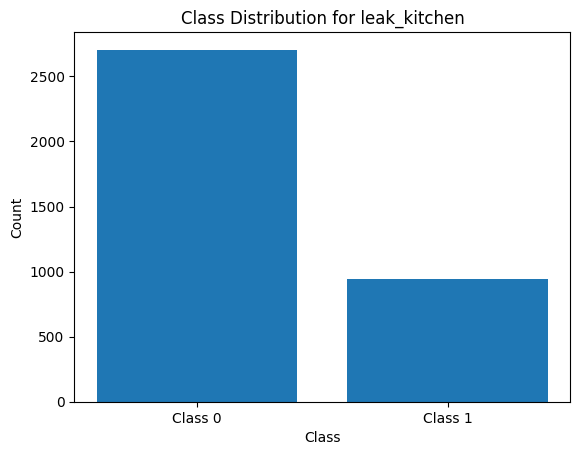

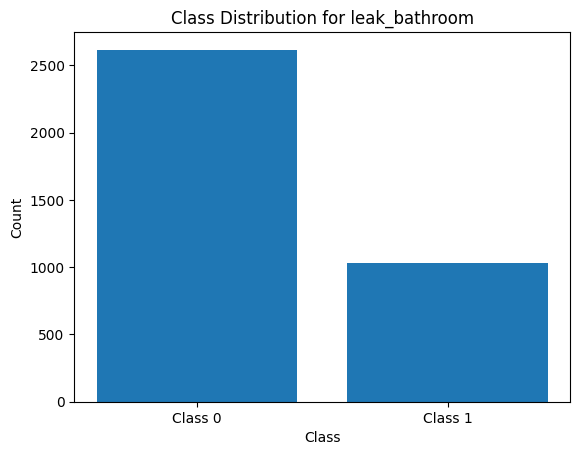

In [ ]:
import matplotlib.pyplot as plt
for col in Y.columns:
    count_class = Y[col].value_counts().sort_index()  # Sort to ensure consistent order (e.g., 0 then 1)
    plt.bar(count_class.index, count_class.values)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title(f'Class Distribution for {col}')
    plt.xticks(count_class.index, [f'Class {i}' for i in count_class.index])
    plt.show()

#Model Training

##Sigmoid Activation

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

##Softmax Activation

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

##Extreme Learning Machine Model

Accuracy: 75.25%
               precision    recall  f1-score   support

    leak_main       0.77      0.85      0.81       666
 leak_kitchen       0.93      0.60      0.73       238
leak_bathroom       0.56      0.62      0.59       191

     accuracy                           0.75      1095
    macro avg       0.76      0.69      0.71      1095
 weighted avg       0.77      0.75      0.75      1095



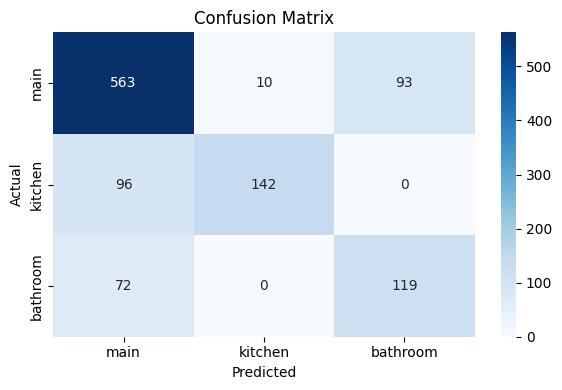

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7, random_state=42)

# smote=SMOTE(sampling_strategy='minority')
# X_train,Y_train = smote.fit_resample(X_train,Y_train)

# Initialize ELM parameters
input_dim = X_train.shape[1]
hidden_dim = 10

np.random.seed(0)
W = np.random.randn(input_dim, hidden_dim)
b = np.random.randn(hidden_dim)

# Hidden layer output (training phase)
H_train = sigmoid(X_train @ W + b)

# Output weights
λ = 1e-4  # Small regularization term
I = np.eye(H_train.shape[1])
beta = np.linalg.inv(H_train.T @ H_train + λ * I) @ H_train.T @ Y_train


# Test phase: Hidden layer output for test set
H_test = sigmoid(X_test @ W + b)

# Output predictions
Y_pred = H_test @ beta

probs = softmax(np.array(Y_pred))

# Get predicted class (argmax over class axis)
predictions = np.argmax(probs, axis=1)
true_labels = np.argmax(Y_test.values, axis=1)

accuracy = np.mean(predictions == true_labels) * 100
print(f"Accuracy: {accuracy:.2f}%")

print(classification_report(true_labels, predictions, target_names=["leak_main", "leak_kitchen", "leak_bathroom"]))

cm = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["main", "kitchen", "bathroom"],
            yticklabels=["main", "kitchen", "bathroom"])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Save model
np.savez("elm_model.npz", W=W, b=b, beta=beta)

##RNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# Drop non-numeric or unneeded columns
features = df.drop(columns=['Timestamp', 'leak_main', 'leak_kitchen', 'leak_bathroom'])

# Create labels as one-hot vectors (assuming multi-class leak classification)
labels = df[['leak_main', 'leak_kitchen', 'leak_bathroom']].values

# Reshape X to (samples, timesteps=1, features)
X_RNN = features.values  # shape: (samples, features)
Y_RNN = labels            # shape: (samples, 3)

model = Sequential([
    layers.Input(shape=(X_RNN.shape[1],)),  # no timesteps
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu6'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_RNN, Y_RNN, epochs=50, batch_size=128)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - categorical_accuracy: 0.6825 - loss: 0.8213
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.8561 - loss: 0.5593
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.8675 - loss: 0.5372
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.8857 - loss: 0.5309
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.9183 - loss: 0.4935
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.9344 - loss: 0.4904
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.9212 - loss: 0.4689
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.9430 - loss: 0.4709
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.9349 - loss: 0.4662
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.9666 - loss: 0.5568
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9387 - loss: 0.7303  
Test Loss: 0.9605
Test Accuracy: 94.06%


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
               precision    recall  f1-score   support

    Main Leak       0.51      0.90      0.65       349
 Kitchen Leak       0.92      0.86      0.89       270
Bathroom Leak       0.85      0.61      0.71       306

    micro avg       0.68      0.79      0.73       925
    macro avg       0.76      0.79      0.75       925
 weighted avg       0.74      0.79      0.74       925
  samples avg       0.67      0.60      0.63       925



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


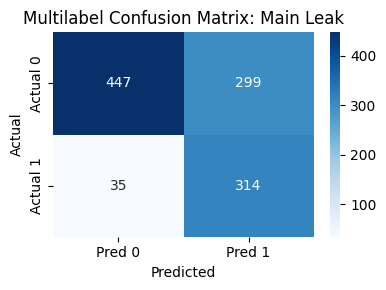

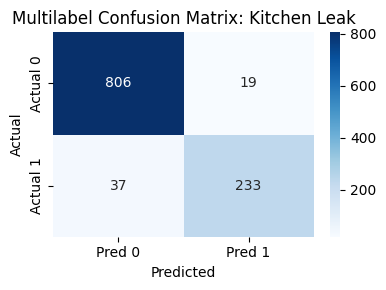

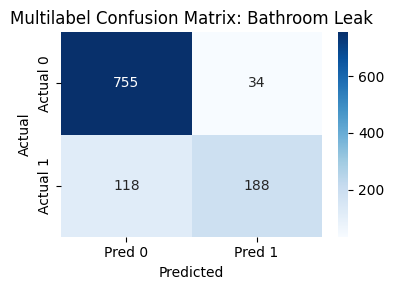

In [ ]:
# Predict on the test set
Y_pred = model.predict(X_test)
# Convert probabilities to class labels (0 or 1)
Y_pred_class = (Y_pred >= 0.5).astype(int)

# Generate classification report
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, Y_pred_class, target_names=["Main Leak", "Kitchen Leak", "Bathroom Leak"]))
from sklearn.metrics import multilabel_confusion_matrix

cm = multilabel_confusion_matrix(Y_test, Y_pred_class)
for i, label in enumerate(["Main Leak", "Kitchen Leak", "Bathroom Leak"]):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm[i], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Multilabel Confusion Matrix: {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

#Model Evaluation

##Checking model size

In [ ]:
import os

# Save original model
model.save('original_model.h5')
# pruned_model.save('pruned_model.h5')

# Ukuran file
print("MLP Size(MB):", os.path.getsize("original_model.h5") / 1e6)
print("ELM Size(MB):", os.path.getsize("elm_model.npz")/1e6)

# print("Pruned Model Size (MB):", os.path.getsize("pruned_model.h5") / 1e6)
# print("Pruned + Quantized Model Size (MB):", os.path.getsize("model_int8.tflite") / 1e6)

MLP Size(MB): 0.359424
ELM Size(MB): 0.00161


#Model Export

##Convert to

In [ ]:
import numpy as np

def to_c_array(name, arr):
    flat = arr.flatten()
    dims = arr.shape
    dim_str = ''.join(f'[{d}]' for d in dims)
    values = ', '.join(f'{x:.6f}f' for x in flat)
    lines = [f'float {name}{dim_str} = {{']
    line = '  '
    for i, val in enumerate(values.split(', ')):
        line += val + ', '
        if (i + 1) % (dims[-1] if len(dims) > 1 else len(flat)) == 0:
            lines.append(line.rstrip(', '))
            line = '  '
    lines.append('};')
    return '\n'.join(lines)

# Load ELM model
model = np.load('elm_model.npz')
W, b, beta = model['W'], model['b'], model['beta']

# Ensure 2D shape for consistency
if beta.ndim == 1:
    beta = beta.reshape(-1, 1)

# Convert to C arrays
with open('elm_model.h', 'w') as f:
    f.write('// Auto-generated ELM model for Arduino\n\n')
    f.write(f'const int input_dim = {W.shape[0]};\n')
    f.write(f'const int hidden_dim = {W.shape[1]};\n')
    f.write(f'const int output_dim = {beta.shape[1]};\n\n')
    f.write(to_c_array('W', W) + '\n\n')
    f.write(to_c_array('b', b) + '\n\n')
    f.write(to_c_array('beta', beta) + '\n')
